In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Z-Score Outlier Removal

In [2]:
df= pd.read_csv('/kaggle/input/student-placement-dataset/Student_Placement_Record.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,college_tier,internship_experience,placement
0,7.19,26.0,Tier 2,1,0
1,7.46,38.0,Tier 3,1,1
2,7.54,40.0,Tier 1,0,0
3,6.42,8.0,Tier 3,0,1
4,7.23,17.0,Tier 2,0,1


In [4]:
df.shape

(1250, 5)

In [5]:
df['placement_exam_marks'].describe()

count    1250.000000
mean       31.833608
std        17.947504
min         0.000000
25%        17.872500
50%        29.000000
75%        43.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

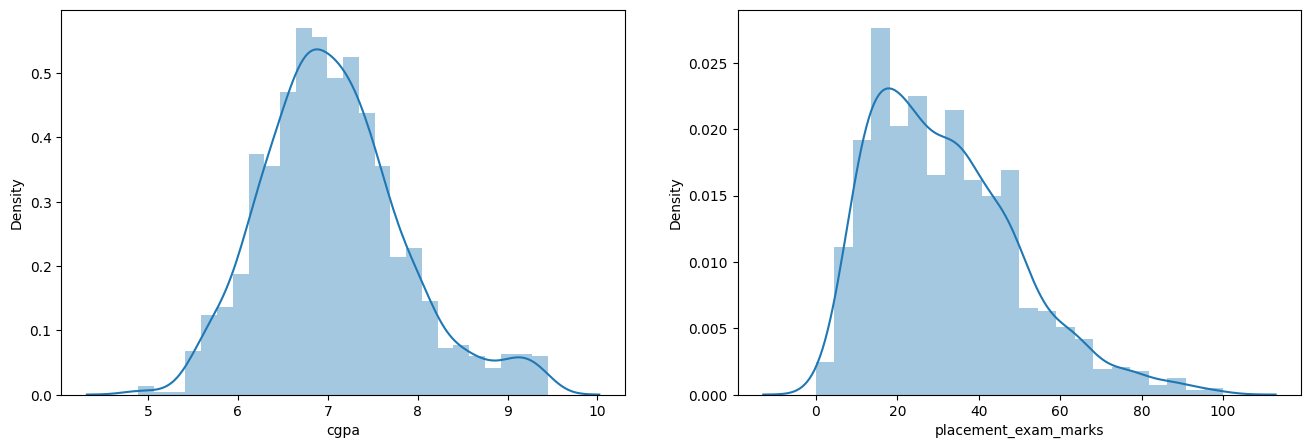

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].skew()

0.8395570950265547

In [8]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 7.061304000000001
Std value of cgpa 0.7909683206623596
Min value of cgpa 4.89
Max value of cgpa 9.45


In [9]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 9.434208961987078
Lowest allowed 4.688399038012922


In [10]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,college_tier,internship_experience,placement
485,4.92,44.00,Tier 2,0,1
995,8.87,44.00,Tier 1,1,1
996,9.12,65.00,Tier 2,1,1
997,4.89,34.00,Tier 1,1,1
999,4.90,10.00,Tier 3,0,0
1001,9.30,25.40,Tier 1,0,1
1007,8.96,37.84,Tier 1,1,1
1011,9.38,49.60,Tier 1,1,0
1012,8.83,15.60,Tier 3,0,0
1033,9.30,13.76,Tier 1,1,1


## Trimming


In [11]:

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,college_tier,internship_experience,placement
0,7.19,26.00,Tier 2,1,0
1,7.46,38.00,Tier 3,1,1
2,7.54,40.00,Tier 1,0,0
3,6.42,8.00,Tier 3,0,1
4,7.23,17.00,Tier 2,0,1
...,...,...,...,...,...
1238,8.08,48.02,Tier 2,0,1
1239,6.21,45.61,Tier 1,1,1
1243,6.98,17.52,Tier 3,0,1
1244,5.56,28.55,Tier 2,0,1


In [12]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df.head()

,cgpa,placement_exam_marks,college_tier,internship_experience,placement,cgpa_zscore
0,7.19,26.0,Tier 2,1,0,0.162707
1,7.46,38.0,Tier 3,1,1,0.504061
2,7.54,40.0,Tier 1,0,0,0.605202
3,6.42,8.0,Tier 3,0,1,-0.810783
4,7.23,17.0,Tier 2,0,1,0.213278


In [14]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,college_tier,internship_experience,placement,cgpa_zscore
1069,9.45,20.01,Tier 3,1,0,3.019964
1154,9.44,22.80,Tier 1,0,1,3.007321


In [15]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,college_tier,internship_experience,placement,cgpa_zscore
1069,9.45,20.01,Tier 3,1,0,3.019964
1154,9.44,22.80,Tier 1,0,1,3.007321


In [16]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [17]:
new_df

,cgpa,placement_exam_marks,college_tier,internship_experience,placement,cgpa_zscore
0,7.19,26.00,Tier 2,1,0,0.162707
1,7.46,38.00,Tier 3,1,1,0.504061
2,7.54,40.00,Tier 1,0,0,0.605202
3,6.42,8.00,Tier 3,0,1,-0.810783
4,7.23,17.00,Tier 2,0,1,0.213278
...,...,...,...,...,...,...
1245,9.21,24.13,Tier 2,1,0,2.716539
1246,7.21,33.35,Tier 2,1,1,0.187992
1247,9.37,13.11,Tier 2,0,0,2.918822
1248,9.35,48.98,Tier 2,1,1,2.893537


## Capping

In [18]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [19]:
lower_limit

4.688399038012922

In [20]:
df.shape

(1250, 6)

In [21]:
df['cgpa'].describe()

count    1250.000000
mean        7.061304
std         0.790968
min         4.890000
25%         6.530000
50%         6.990000
75%         7.510000
max         9.450000
Name: cgpa, dtype: float64

# IQR-Method

In [22]:
df['placement_exam_marks'].describe()

count    1250.000000
mean       31.833608
std        17.947504
min         0.000000
25%        17.872500
50%        29.000000
75%        43.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

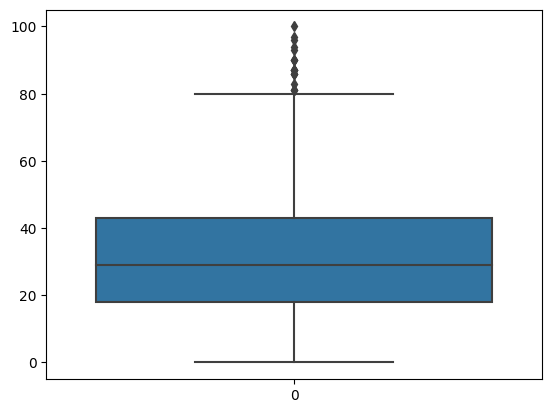

In [23]:
sns.boxplot(df['placement_exam_marks'])

In [24]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [25]:
percentile75

43.0

In [26]:
iqr = percentile75 - percentile25

In [27]:
iqr

25.1275

In [28]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [29]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 80.69125
Lower limit -19.818750000000005


## Finding Outlier

In [30]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,college_tier,internship_experience,placement,cgpa_zscore
9,7.75,94.0,Tier 3,1,1,0.870700
40,6.60,86.0,Tier 2,1,0,-0.583214
61,7.51,86.0,Tier 2,0,0,0.567274
134,6.33,93.0,Tier 3,1,1,-0.924568
157,7.07,81.0,Tier 2,0,0,0.010994
162,7.80,90.0,Tier 1,1,0,0.933914
283,7.09,87.0,Tier 2,0,1,0.036280
290,8.38,87.0,Tier 1,1,1,1.667192
311,6.97,87.0,Tier 3,0,0,-0.115433
324,6.64,90.0,Tier 2,1,0,-0.532643


In [31]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,college_tier,internship_experience,placement,cgpa_zscore


## Trimming

In [32]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [33]:
new_df.shape

(1231, 6)

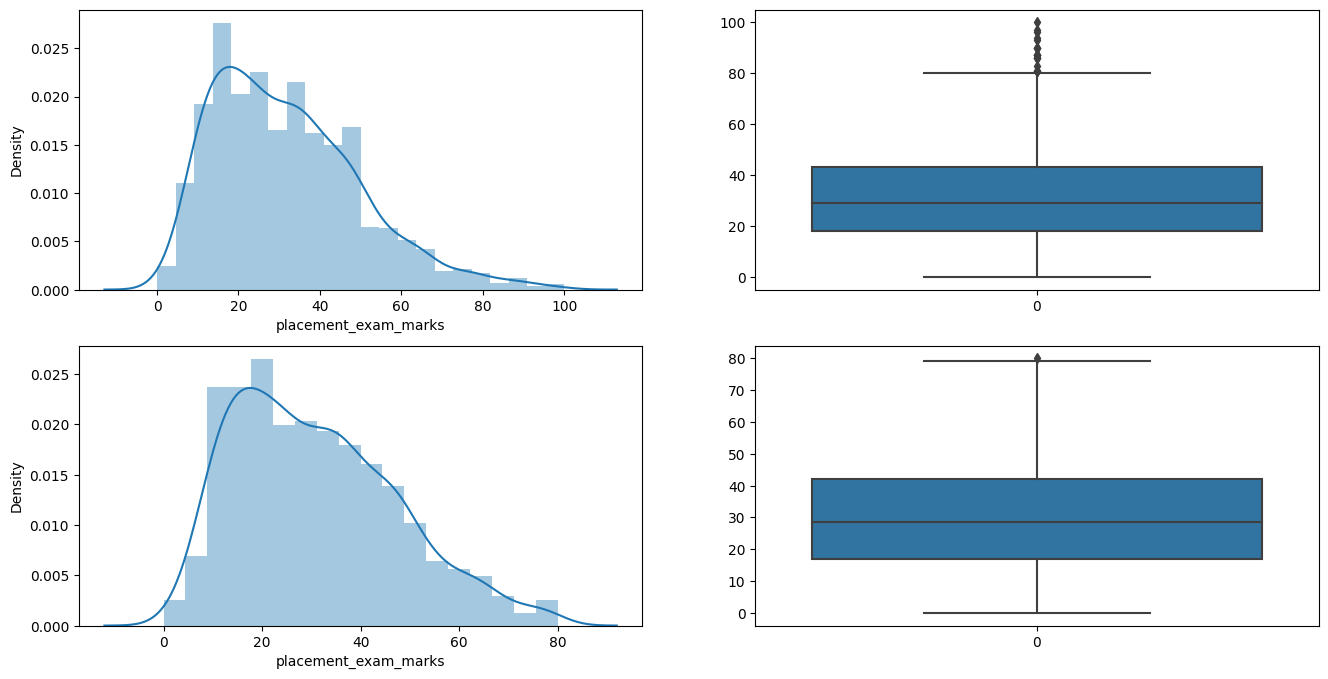

In [34]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping

In [35]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [36]:
new_df_cap.shape

(1250, 6)

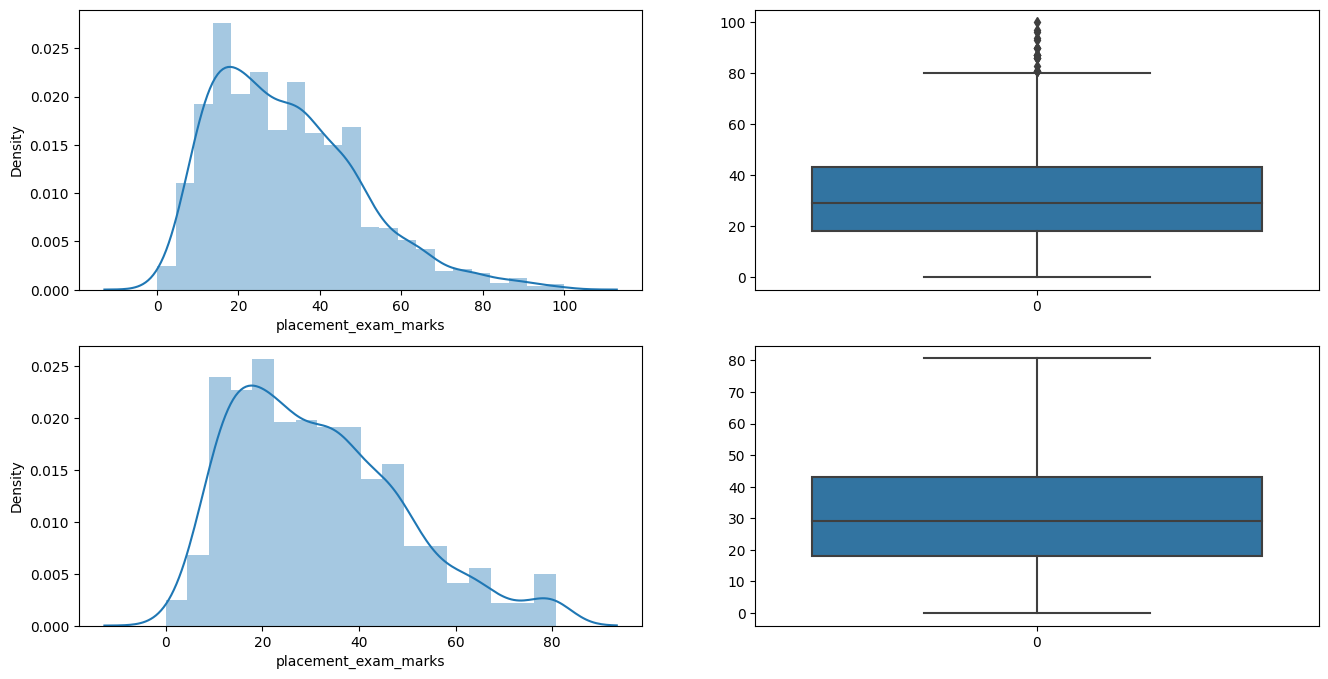

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()
